In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import pylab as plt
from matplotlib.colors import LogNorm


In [2]:
# making some color maps
!pip install colour
import matplotlib

eliteblues = matplotlib.colors.ListedColormap(["white","#193750"], name='darkblues', 
                                        N=None)
darkblues = matplotlib.colors.ListedColormap(["white","#0f2231"], name='darkblues', 
                                        N=None)
cyans = matplotlib.colors.ListedColormap(["white","cyan"], name='cyans', 
                                        N=None)
darkgreens = matplotlib.colors.ListedColormap(["white","#076e69"], name='darkgreen', 
                                        N=None)
yellows = matplotlib.colors.ListedColormap(["white","yellow"], name='yellows', 
                                        N=None)
pinks =  matplotlib.colors.ListedColormap(["white","#f88"], name='pinks', 
                                        N=None)


#setting colors per band - inspired by the rainbow
#Rainbow order: Red, Orange, Yellow, Green, Blue, Indigo and Violet.
cmaps = {"w2":"black",#Grays, 
         "m2":"#0f2231",#darkblues, 
         "w1":"#193750",#eliteblues,
         "U":"purple",#'Blues',
         "u":"purple",
         "B":"indigo",#cyans, 
         'g':"violet", #"Purples", 
         'V':"green",#"Oranges"
         'R':"orange",#'Reds',
         'r':"orange",#'Reds', 
         'I':"gold", #pinks,'i':pinks,
         'i':"gold",
        'J':"IndianRed",#yellows,
        'H':"red",#"Greens",
        'K':"DarkRed"#darkgreens
        }



In [3]:
# bands list sorted by wavelength
bands = ["w2","m2","w1","U","u", "B", "g","V",
         "R", "r", "I","i","J","H", "K"]

# testing with B band

In [4]:
bdata = pkl.load(open("data/alldata_B.pkl", "rb"))

In [5]:
# explore the data structure
bdata.keys()

dict_keys(['x', 'y', 'yerr', 'phases', 'allSNe'])

In [6]:
# number of SNe with data in B band
np.array([len(mag)>0 for mag in bdata['allSNe']['mag']]).sum()

117

In [7]:
# individual SN data is in 'allSNe'
bdata['allSNe'].keys()

dict_keys(['mag', 'dmag', 'phase', 'name', 'type'])

In [8]:
#number of SNe in data
len(bdata['allSNe']['mag'])

164

In [9]:
#read the data for each band into a dataframe for convenience
alldata = {}
for b in bands:
    data = pkl.load(open(f"data/alldata_{b}.pkl", "rb"))
    print(len(data['allSNe']['mag']))
    df = pd.DataFrame({k:data['allSNe'][k][0] 
                       for k in data['allSNe'].keys()})
    df['band'] = b
    df.set_index(["name", "band"], inplace=True)
    df
    for i in range(1, len(data['allSNe']['mag'])):
        _ = pd.DataFrame({k:data['allSNe'][k][i] 
                           for k in data['allSNe'].keys()})
        _['band'] = b
        _.set_index(["name", "band"], inplace=True)
       #_["SNR"] = 
        df = pd.concat([df, _])
    alldata[b] = df
    
alldata[b].index.levels[0]

163
163
163
164
164
164
164
164
164
164
164
164
164
164
164


Index(['05az', '05bf', '05hg', '05kl', '05mf', '06aj', '06fo', '06jc', '07C',
       '07I', '07ce', '07d', '07gr', '07uy', '08ax', '08d', '09K', '09er',
       '09iz', '09jf', '10al', '12bz', '99dn', 'PS1-12sk', 'PTF12gzk'],
      dtype='object', name='name')

RED FLAG: some bands have 163, some 164 SNe

In [10]:
allsnenames = pkl.load(open("input/allSNe.pkl", "rb"))
allsnenames = [allsnenames[b]['name'] for b in 
          bands]
allsnenames

[['ASASSN-14ms',
  'DES16s1kt',
  'iPTF13bvn',
  'iPTF15dld',
  'iPTF15dtg',
  'LSQ13ccw',
  'LSQ14efd',
  'OGLE-2012-sn-006',
  'OGLE-2013-sn-091',
  'OGLE-2013-sn-134',
  'OGLE-2014-sn-014',
  'OGLE-2014-sn-131',
  'OGLE15eo',
  'OGLE15jy',
  'OGLE15rb',
  'OGLE15vk',
  'OGLE16ekf',
  'PS1-12sk',
  'PTF10qts',
  'PTF11kmb',
  'PTF11qcj',
  'PTF12gzk',
  'PTF12hni',
  'SDSS-II14475',
  'SDSS-II19065',
  'SDSS-II19190',
  'SDSS-II4664',
  'SDSS-II5339',
  'SDSS-II6861',
  'SDSS-II8196',
  '54A',
  '62L',
  '83N',
  '83V',
  '84I',
  '85F',
  '91N',
  '93J',
  '94I',
  '96cb',
  '97ef',
  '98bw',
  '99dn',
  '99ex',
  '01ig',
  '02ap',
  '02ji',
  '03bg',
  '03dh',
  '03id',
  '03jd',
  '04aw',
  '04dk',
  '04dn',
  '04ex',
  '04fe',
  '04ff',
  '04gq',
  '04gt',
  '04gv',
  '05az',
  '05bf',
  '05by',
  '05em',
  '05fk',
  '05hg',
  '05hl',
  '05hm',
  '05kl',
  '05kr',
  '05ks',
  '05kz',
  '05mf',
  '06ba',
  '06bf',
  '06cb',
  '06el',
  '06ep',
  '06fo',
  '06ir',
  '06jc',
  '06jo

In [11]:
allsnenames = pkl.load(open("input/allSNe.pkl", "rb"))
allsnenames = [allsnenames[b]['name'] for b in 
          bands]
allsnenames = set([item for sublist in allsnenames for item in sublist])
len(allsnenames)
    

164

In [12]:
alldata['w2'].groupby("name").count()[['mag']]

,mag
name,
06jc,25
07Y,9
07uy,10
08aq,2
08ax,7
08bo,2
09mg,4
10al,9
10cn,5


In [13]:
sncount = pd.DataFrame(columns = ["mag"])
for b in bands: 
    _ = alldata[b].groupby("name").count()[['mag']].rename({'mag':b}, axis=1)
    sncount = pd.concat([sncount, _], axis=1)
sncount.sum(axis=1).median()

89.5

# read in all SNe

In [14]:
#example band
alldata["w2"]

mag   dmag  phase type
name        band                              
ASASSN-14ms w2    14.606000  0.042  -1.00   Ib
            w2    14.935000  0.040   1.00   Ib
iPTF13bvn   w2    19.809000  0.439 -11.00   Ib
            w2    19.103001  0.246  -5.50   Ib
            w2    19.295000  0.286  -5.50   Ib
...                     ...    ...    ...  ...
16gkg       w2    18.479000  0.127  -0.50  IIb
            w2    18.723000  0.150   3.50  IIb
            w2    19.326000  0.235   6.75  IIb
            w2    19.479000  0.225   8.25  IIb
            w2    19.416000  0.262   9.75  IIb

[313 rows x 4 columns]

In [15]:
# check length of B data is still 117
len(alldata["B"].reset_index().reset_index()['name'].unique())

117

In [16]:
# index of each band data is the SN name
alldata["B"].index.levels[0]

Index(['01ig', '02ap', '03bg', '03dh', '03id', '03jd', '04aw', '04dk', '04dn',
       '04ex',
       ...
       'LSQ13ccw', 'LSQ14efd', 'OGLE-2012-sn-006', 'PS1-12sk', 'PTF10qts',
       'PTF11kmb', 'PTF12gzk', 'PTF12hni', 'iPTF13bvn', 'iPTF15dtg'],
      dtype='object', name='name', length=117)

In [17]:
#this is how you count the number of observations per SN, example w2
alldata["w2"].groupby("name").count()

,mag,dmag,phase,type
name,,,,
06jc,25,25,25,25
07Y,9,9,9,9
07uy,10,10,10,10
08aq,2,2,2,2
08ax,7,7,7,7
08bo,2,2,2,2
09mg,4,4,4,4
10al,9,9,9,9
10cn,5,5,5,5


In [18]:
# this could be a measure of SNR but I think its wrong
alldata["B"]['mag'] / alldata["B"]['dmag'] 

name         band
ASASSN-14ms  B       345.531922
             B       339.020845
             B       417.666647
iPTF13bvn    B       994.777828
             B       849.428552
                        ...    
17ein        B       113.353656
19aajs       B       221.125012
             B       199.222218
             B       153.249998
             B        88.904765
Length: 4116, dtype: float64

In [19]:
# create an integer day phase column
alldata["B"]["intphase"] = np.floor(alldata["B"]['phase'])##np.sign(alldata["B"]['phase']) * 0.5).astype(int)

In [20]:
# this is how you count the number of data points per day per SN
alldata["B"].groupby(['name', 'intphase']).count()

mag  dmag  phase  type
name      intphase                        
01ig      -18.0       1     1      1     1
02ap      -10.0       2     2      2     2
          -9.0        2     2      2     2
          -8.0        7     7      7     7
          -7.0       11    11     11    11
...                 ...   ...    ...   ...
iPTF15dtg  2.0        2     2      2     2
           3.0        1     1      1     1
           4.0        1     1      1     1
           6.0        1     1      1     1
           7.0        1     1      1     1

[2550 rows x 4 columns]

# number of observations per SN per day (dictionary)

In [21]:
# contains the number of observations per day per SN - day and SN are doubel indices
# one dataframe per band, the dataframes are stored in a dictionary
grouped = {}

In [22]:
grouped['B'] = alldata["B"].groupby(['name', 'intphase']).count()
grouped['B'].index.levels[0]

Index(['01ig', '02ap', '03bg', '03dh', '03id', '03jd', '04aw', '04dk', '04dn',
       '04ex',
       ...
       'LSQ13ccw', 'LSQ14efd', 'OGLE-2012-sn-006', 'PS1-12sk', 'PTF10qts',
       'PTF11kmb', 'PTF12gzk', 'PTF12hni', 'iPTF13bvn', 'iPTF15dtg'],
      dtype='object', name='name', length=117)

In [23]:
# example iPTF15dtg
_ = grouped['B'].loc["iPTF15dtg"]
#for j in _.index:
_

,mag,dmag,phase,type
intphase,,,,
-16.0,1,1,1,1
-14.0,1,1,1,1
-7.0,1,1,1,1
-5.0,1,1,1,1
2.0,2,2,2,2
3.0,1,1,1,1
4.0,1,1,1,1
6.0,1,1,1,1
7.0,1,1,1,1


In [24]:
# Median N of observations for SN

In [25]:
alldata["B"].index.levels[0]

Index(['01ig', '02ap', '03bg', '03dh', '03id', '03jd', '04aw', '04dk', '04dn',
       '04ex',
       ...
       'LSQ13ccw', 'LSQ14efd', 'OGLE-2012-sn-006', 'PS1-12sk', 'PTF10qts',
       'PTF11kmb', 'PTF12gzk', 'PTF12hni', 'iPTF13bvn', 'iPTF15dtg'],
      dtype='object', name='name', length=117)

In [26]:
# make a container
countsarray = np.zeros((len(allsnenames), 130))

#loop over bands to group by day and SN
for b in bands:
    #add the integer day phase column for all bands
    alldata[b]["intphase"] = np.floor(alldata[b]['phase']).astype(int)
    
    #number of observations per day per SN - a dataframe for each band
    grouped[b] = alldata[b].groupby(['name', 'intphase']).count()

    #pick each SN
    for i,sn in enumerate(allsnenames):
        # some SNe are missing from the dataframe
        try: 
            _ = grouped[b].loc[sn]
        except KeyError:
            continue
        
        #add to the array cell the number of observations in this band
        for j in _.index:
            if j < countsarray.shape[1] - 30:
                countsarray[i][j+30] += _.loc[j]['mag']
                
# set days with no coverage to NaN
countsarray[countsarray==0] = np.nan# make a container

# B band store the number of observations per SN per day in an array
Only populate only phase -30 to 100

In [27]:
# make a container
countsarray = np.zeros((len(allsnenames), 130))

#loop over bands to group by day and SN
for b in bands:
    #add the integer day phase column for all bands
    alldata[b]["intphase"] = np.floor(alldata[b]['phase']).astype(int)
    
    #number of observations per day per SN - a dataframe for each band
    grouped[b] = alldata[b].groupby(['name', 'intphase']).count()

    #pick each SN
    for i,sn in enumerate(allsnenames):
        # some SNe are missing from the dataframe
        try: 
            _ = grouped[b].loc[sn]
        except KeyError:
            continue
        
        #add to the array cell the number of observations in this band
        for j in _.index:
            if j < countsarray.shape[1] - 30:
                countsarray[i][j+30] += _.loc[j]['mag']
                
# set days with no coverage to NaN
countsarray[countsarray==0] = np.nan# make a container


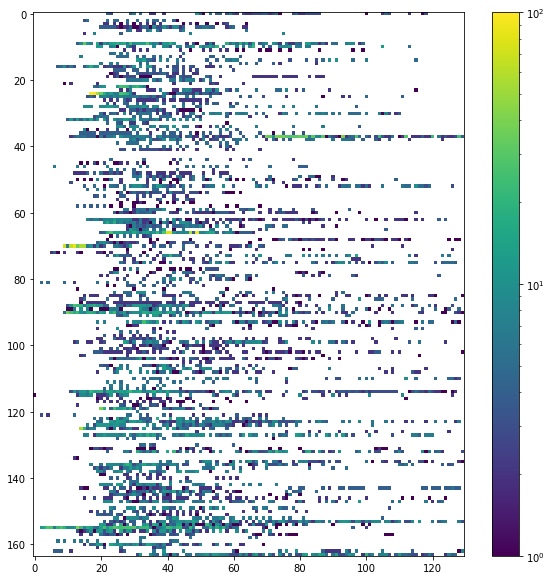

In [28]:
# B band observations per day 
fig = plt.figure(figsize=(10,10))
plt.imshow(countsarray, norm=LogNorm(vmin=1, vmax=100))
plt.colorbar()

Fig 1: coverage in B band for all SNe up to 130 days. Only 117 SNe have some coverage so cells of the pre-designed array remain empty after row 117. Need a better solution

In [29]:
len(allsnenames)

164

In [30]:
# make a container
countsarray = np.zeros((len(allsnenames), 130))

#loop over bands to group by day and SN
for b in bands:
    #add the integer day phase column for all bands
    alldata[b]["intphase"] = np.floor(alldata[b]['phase']).astype(int)
    
    #number of observations per day per SN - a dataframe for each band
    grouped[b] = alldata[b].groupby(['name', 'intphase']).count()

    #pick each SN
    for i,sn in enumerate(allsnenames):
        # some SNe are missing from the dataframe
        try: 
            _ = grouped[b].loc[sn]
        except KeyError:
            continue
        
        #add to the array cell the number of observations in this band
        for j in _.index:
            if j < countsarray.shape[1] - 30:
                countsarray[i][j+30] += _.loc[j]['mag']
                
# set days with no coverage to NaN
countsarray[countsarray==0] = np.nan

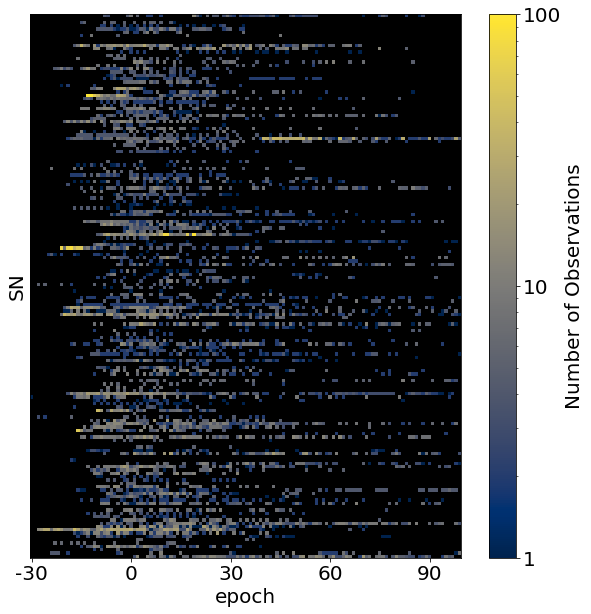

In [31]:
plt.rcParams['font.size'] = 20
ax = plt.figure(figsize=(10,10)).add_subplot()

#plot in black the empty cells
ax.imshow(np.isnan(countsarray), cmap='binary')

#plot in color map the filled cells - log color
sne = ax.imshow(countsarray, norm=LogNorm(vmin=1, vmax=100),
               cmap="cividis")

#color bar set up
cb = plt.colorbar(sne)
cb.set_ticks([1, 10, 100], labels=["1", "10", "100"])
cb.set_label("Number of Observations")

#fixing esthetics
ax.set_yticks([])
ax.set_xticks(range(0,130,30), 
              labels=["%d"%(i-30) for i in range(0,130,30)])
ax.set_ylabel("SN")
plt.xlabel("epoch")
ax.get_xticks();
#countsarray.shape

Fig 2: coverage of 164 SNe in the sample, any band

In [42]:
allsnenames

{'01ig',
 '02ap',
 '02ji',
 '03bg',
 '03dh',
 '03id',
 '03jd',
 '04aw',
 '04dk',
 '04dn',
 '04ex',
 '04fe',
 '04ff',
 '04gq',
 '04gt',
 '04gv',
 '05az',
 '05bf',
 '05by',
 '05em',
 '05fk',
 '05hg',
 '05hl',
 '05hm',
 '05kl',
 '05kr',
 '05ks',
 '05kz',
 '05mf',
 '06T',
 '06aj',
 '06ba',
 '06bf',
 '06cb',
 '06el',
 '06ep',
 '06fo',
 '06ir',
 '06jc',
 '06jo',
 '06lc',
 '06nx',
 '07C',
 '07I',
 '07Y',
 '07ag',
 '07ay',
 '07ce',
 '07cl',
 '07d',
 '07gr',
 '07ke',
 '07kj',
 '07ms',
 '07nc',
 '07qv',
 '07qw',
 '07ru',
 '07rz',
 '07uy',
 '08aq',
 '08ax',
 '08bo',
 '08cw',
 '08d',
 '09K',
 '09bb',
 '09er',
 '09iz',
 '09jf',
 '09mg',
 '09mk',
 '10X',
 '10al',
 '10as',
 '10ay',
 '10bh',
 '10cn',
 '10et',
 '10jr',
 '11am',
 '11bm',
 '11dh',
 '11ei',
 '11fu',
 '11hg',
 '11hs',
 '11hw',
 '12P',
 '12ap',
 '12au',
 '12bz',
 '12cd',
 '12hn',
 '13ak',
 '13cq',
 '13cu',
 '13df',
 '13dk',
 '13ge',
 '14C',
 '14L',
 '14ad',
 '15U',
 '15ap',
 '16bau',
 '16gkg',
 '16hgs',
 '17ein',
 '18bcc',
 '19aajs',
 '19al

In [72]:
def nammetoyear(name):
    if name.startswith(tuple('0123456789')):
        y = int(name[:2])
    elif "ASASSN" in name:
        y = int(name.split('-')[1][:2])
    elif "DES" in name or "LSQ" in name or "PTF" in name or "PS1" in name or ("OGLE" in name and not "-" in name):
        y = int(name.replace("DES","").replace("LSQ","").replace("iPTF","").replace("PTF",
                                        "").replace("OGLE","").replace("PS1-","")[:2])
    elif "OGLE" in name:
        y = int(name.split("-")[1][2:])
    elif "SDSS-II" in name:
        y = 10
    if y < 30:
        return y + 100
    return y
allsnedates = [nammetoyear(y) for y in allsnenames]
print(list(zip(allsnedates, allsnenames)))

[(105, '05az'), (115, 'OGLE15jy'), (106, '06nx'), (103, '03id'), (111, 'PTF11kmb'), (112, '12hn'), (116, '16bau'), (119, '19pik'), (114, 'OGLE-2014-sn-131'), (113, 'iPTF13bvn'), (104, '04gq'), (105, '05by'), (107, '07ay'), (110, 'SDSS-II4664'), (106, '06ir'), (105, '05hl'), (109, '09K'), (113, '13ak'), (119, '19rii'), (118, '18bcc'), (109, '09er'), (103, '03bg'), (112, 'PTF12gzk'), (107, '07ru'), (103, '03dh'), (110, '10as'), (112, '12ap'), (110, 'SDSS-II19065'), (104, '04ex'), (115, '15U'), (108, '08bo'), (110, 'SDSS-II14475'), (99, '99ex'), (110, '10cn'), (104, '04ff'), (119, '19gqd'), (110, '10jr'), (111, '11dh'), (105, '05mf'), (112, '12au'), (108, '08cw'), (119, '19php'), (114, 'OGLE-2014-sn-014'), (102, '02ji'), (110, 'SDSS-II5339'), (119, '19ilo'), (105, '05hm'), (110, 'SDSS-II8196'), (113, '13cq'), (107, '07ce'), (114, 'LSQ14efd'), (119, '19bjv'), (112, '12P'), (105, '05kr'), (119, '19myn'), (115, '15ap'), (110, '10X'), (91, '91N'), (111, '11hw'), (106, '06bf'), (104, '04aw'), 

In [73]:
list(allsnenames)

['05az',
 'OGLE15jy',
 '06nx',
 '03id',
 'PTF11kmb',
 '12hn',
 '16bau',
 '19pik',
 'OGLE-2014-sn-131',
 'iPTF13bvn',
 '04gq',
 '05by',
 '07ay',
 'SDSS-II4664',
 '06ir',
 '05hl',
 '09K',
 '13ak',
 '19rii',
 '18bcc',
 '09er',
 '03bg',
 'PTF12gzk',
 '07ru',
 '03dh',
 '10as',
 '12ap',
 'SDSS-II19065',
 '04ex',
 '15U',
 '08bo',
 'SDSS-II14475',
 '99ex',
 '10cn',
 '04ff',
 '19gqd',
 '10jr',
 '11dh',
 '05mf',
 '12au',
 '08cw',
 '19php',
 'OGLE-2014-sn-014',
 '02ji',
 'SDSS-II5339',
 '19ilo',
 '05hm',
 'SDSS-II8196',
 '13cq',
 '07ce',
 'LSQ14efd',
 '19bjv',
 '12P',
 '05kr',
 '19myn',
 '15ap',
 '10X',
 '91N',
 '11hw',
 '06bf',
 '04aw',
 'OGLE-2013-sn-134',
 '13ge',
 '11hs',
 '19aajs',
 '07ag',
 '02ap',
 '14C',
 '54A',
 '83N',
 '16gkg',
 'OGLE-2012-sn-006',
 '04dk',
 '08aq',
 '99dn',
 '05kl',
 'OGLE15vk',
 'ASASSN-14ms',
 '07d',
 'iPTF15dld',
 'PS1-12sk',
 'SDSS-II19190',
 '13cu',
 '85F',
 '07cl',
 '11fu',
 'DES16s1kt',
 '17ein',
 '08d',
 'iPTF15dtg',
 '08ax',
 '06ba',
 '19all',
 '06fo',
 '03jd'

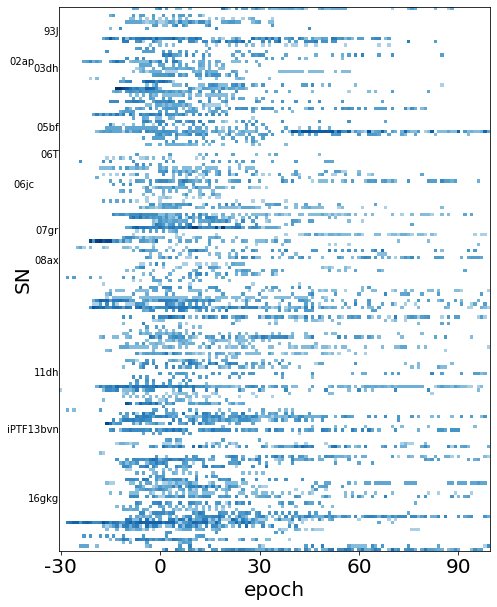

In [74]:
plt.rcParams['font.size'] = 20
ax = plt.figure(figsize=(10,10)).add_subplot()

#plot in color map the filled cells - log color
sne = ax.imshow(countsarray, cmap="Blues", norm=LogNorm(vmin=0.1, vmax=100))

for i,sn in enumerate(np.array(list(allsnenames))[np.argsort(allsnedates)]):
    snsize = 0#False
    # some SNe are missing from the dataframe
    #print(sn)
    for b in bands:
        
        try: 
            _ = grouped[b].loc[sn]
        except KeyError:
            continue
        #print(_.mag.sum())
        snsize += _.mag.sum()
        #if _.mag.max() > 10:
         #   snsize=True
    if snsize > 500:
        x=-0.5
        if sn == "06jc" or sn == "02ap": 
            x = -8
        
        ax.text(x, i, sn, ha="right", va="center", fontsize=10)
                
#color bar set up
#cb = plt.colorbar(sne)
#cb.set_ticks([1, 10, 100], labels=["1", "10", "100"])
#cb.set_label("Number of Observations")

#fixing esthetics
ax.set_yticks([])
ax.set_xticks(range(0,130,30), 
              labels=["%d"%(i-30) for i in range(0,130,30)])
ax.set_ylabel("SN\n")
plt.xlabel("epoch")
ax.get_xticks();
#countsarray.shape

Fig 3: same as Fig 2 with a different color scheme: coverage of 164 SNe in the sample, any band

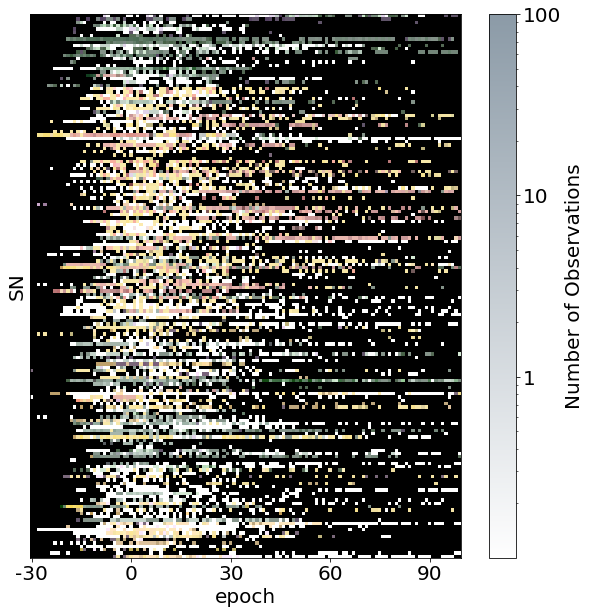

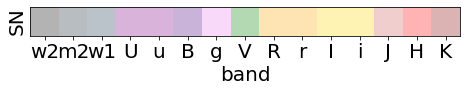

In [75]:
plt.rcParams['font.size'] = 20
ax = plt.figure(figsize=(10,10)).add_subplot()

#set to black the SN/days without coverage - reuse the old array
ax.imshow(np.isnan(countsarray), cmap='binary')

# for each band fill in the array with observations and plot in a specific color
for b in bands:
    
    #set a gradual color map starting with black ending with the band color
    colors = [(1, 1, 1), cmaps[b]] 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "Custom", colors, N=2000)

    # make a new container
    countsarray2 = np.zeros((len(allsnenames), 130))

    # as before, group by dame and integer phase, set array cell to count
    grouped[b] = alldata[b].groupby(['name', 'intphase']).count()
    for i,sn in enumerate(np.array(list(allsnenames))[np.argsort(allsnedates)]):
        try: 
            _ = grouped[b].loc[sn]
        except KeyError:
            continue
        for j in _.index:
            if j < countsarray2.shape[1] - 30:
                countsarray2[i][j+30] = _.loc[j]['mag']
                
    sne = ax.imshow(countsarray2, cmap=cmap, 
                    norm=LogNorm(vmin=0.1, vmax=100), alpha=0.5)

    if b == "w1":
        cb = plt.colorbar(sne)
        cb.set_ticks([1, 10, 100], labels=["1", "10", "100"])
        cb.set_label("Number of Observations")

ax.set_yticks([])
ax.set_xticks(range(0,130,30), 
              labels=["%d"%(i-30) for i in range(0,130,30)])
ax.set_ylabel("SN")
plt.xlabel("epoch")
ax.get_xticks()
#countsarray.shape

ax = plt.figure(figsize=(7.7,1)).add_subplot()
ax.set_ylabel("SN")
ax.set_xlabel("band")

for i,b in enumerate(bands):
    colorcode = np.empty((1, len(bands))) * np.nan
    colorcode[:,i] = 1
    colors = [(1, 1, 1), cmaps[b]] 
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "Custom", colors, N=2000)
    plt.imshow(colorcode, cmap=cmap, clim=(0,1), alpha=0.3)
    ax.set_xticks(np.arange(len(bands)), bands)
ax.set_yticks([]);


Fig 4: count of observations with colors associated to the band. A bit tricky to visualize the color association

In [76]:
plt.subplots?

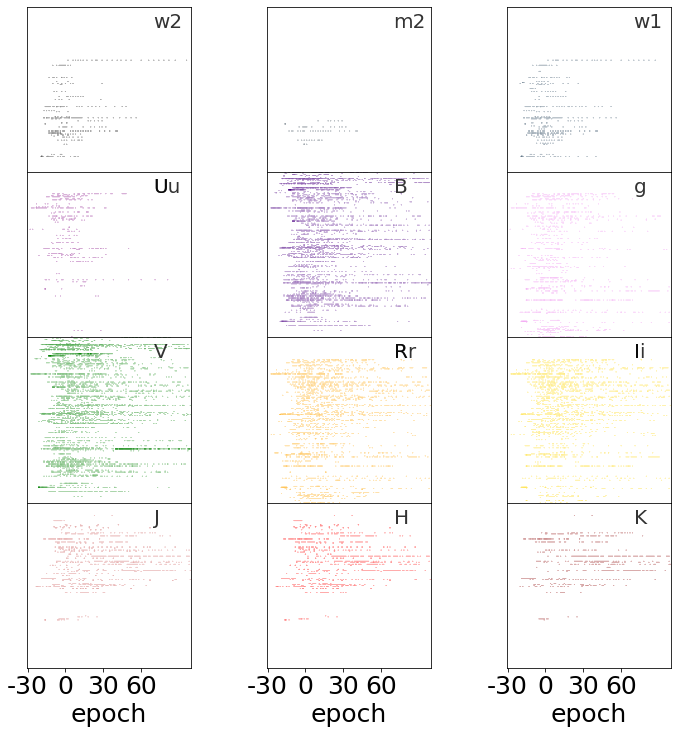

In [80]:
plt.rcParams['font.size'] = 20

#split each band in a subplot
#there are 12 plots (15 bands but 3 are grouped: Uu, Rr, Ii)
fig, axes = plt.subplots(4, 3, sharey=True, squeeze=True,
                         #hspace=0, vspace=0,
                        gridspec_kw={"hspace":0, "wspace":0},
                         figsize=(10,10))
            
axn = -1
for b in bands:
    #plot Uu Rr Ii in the same figure
    if  len(b)>1 or b.isupper() or b=='g': 
        #ax = plt.figure(figsize=(5,5)).add_subplot()
        axn+=1
    
    colors = [(1, 1, 1), cmaps[b]] # first color is black, last is the bands color
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        "Custom", colors, N=2000)

    #remake an empty array
    countsarray2 = np.zeros((len(allsnenames), 130))

    try: 
        alldata[b]["intphase"] = (alldata[b]['phase'] + 
                                np.sign(alldata[b]['phase']) * 
                                0.5).astype(int)
        #print(b)
    except KeyError:
        continue
    grouped[b] = alldata[b].groupby(['name', 'intphase']).count()
    for i,sn in enumerate(np.array(list(allsnenames))[np.argsort(allsnedates)]):
        try: 
            _ = grouped[b].loc[sn]
        except KeyError:
            continue
        for j in _.index:
            if j < countsarray2.shape[1] - 30:
                countsarray2[i][j+30] += _.loc[j]['mag']
    #countsarray[countsarray==0] = np.nan
    ax = axes[axn//3, axn%3]
    sne = ax.imshow(countsarray2, cmap=cmap, aspect=0.8,
                    norm=LogNorm(vmin=0.1, vmax=100))
    ax.set_yticks([])
    ax.set_xticks([0,30,60, 90], 
              labels=["%d"%(i-30) for i in [0,30,60, 90]], fontsize=25)
    ax.text(100,20, b if len(b)>1 or b.isupper() or b=='g' 
            else b.upper()+b, fontsize=20, alpha=0.8)
    #ax.set_ylabel("SN, %s"%b)
    if axn//3 == 3:
        ax.set_xlabel("epoch", fontsize=25)
    else:
        ax.set_xticks([])
    if b == "w2":
        sn_saved = sne

    #ax.get_xticks()

fig.tight_layout(pad=0)
ax = axes[6//3, 6%3]
#ax.text(-25, 1, "SN", fontsize=30, rotation=90)


/var/folders/55/hm2934r523sg5qfprlq_4zkm0000gq/T/ipykernel_12217/2407689363.py:4: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(sn_saved, location="bottom", fraction=1)


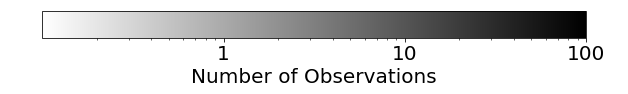

In [78]:

# ========= color bar ========== #
ax = plt.figure(figsize=(11,0.5)).add_subplot()
ax.axis('off') 
cb = plt.colorbar(sn_saved, location="bottom", fraction=1)
cb.set_ticks([1, 10, 100], labels=["1", "10", "100"])
cb.set_label("Number of Observations")


Fig 5: each band is shown separately, coverage in each band is shown by the intensity of the associated color - cannot put a colorbar here wasily
    